### EDA on Netflix data

Exploratory Data Analysis or EDA , is an important step to be performed in Data Science projects. EDA is generally the process of visualising datasets to find out different patterns in the datasets, analyzing the anomalies behaviour of the datasets and building assumptions or hypothesis based on the understanding of the data

### import  necessary libraries for EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set(style="darkgrid")


### read the data

In [3]:
data = pd.read_csv(r'C:\Users\Prashant\Downloads\Netflix_EDA-main\Netflix_EDA-main\Dataset\netflix_titles 121.csv',header = 0,index_col =0)
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### check shape, info , statsistical summary of the data

In [35]:
print(data.shape)
print(f'The Data-Set Contain {data.shape[0]} Rows and {data.shape[1]} Columns')

(8807, 11)
The Data-Set Contain 8807 Rows and 11 Columns


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [37]:
data.describe(include='object').T

,count,unique,top,freq
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362
description,8807,8775,"Paranormal activity at a lush, abandoned prope...",4


### check if there are any null values. if yes then handle them

In [38]:
data.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

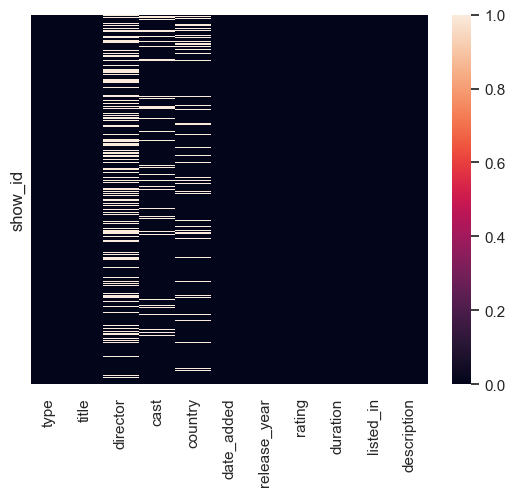

In [39]:
sns.heatmap(data.isnull(),yticklabels=False)
plt.show()

##### there more than 5 percent misisng values in  director , cast and country columns .we will fill it accordingly

In [40]:
data['director'].fillna(value = 'NoData', inplace =True)
data['cast'].fillna(value = 'NoData', inplace =True)

cols = ['country','date_added','rating','duration']
for col in cols :
    data[col].fillna(value = data[col].mode()[0] , inplace =True)
    
data.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### check for duplicates

In [41]:
data.duplicated().sum()

0

##### no duplicate values in the data

## data Cleaning

##### we will add new columns for data_added month and year for better understatning

In [42]:
data["date_added_month"]=pd.DatetimeIndex(data["date_added"]).month
data["date_added_year"]=pd.DatetimeIndex(data["date_added"]).year

data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_year
show_id,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NoData,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
s2,TV Show,Blood & Water,NoData,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021
s4,TV Show,Jailbirds New Orleans,NoData,NoData,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021
s5,TV Show,Kota Factory,NoData,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021


##### we will convert the categories of the rating columns in small gropus of categories accordingly

In [43]:
data['rating'].value_counts()

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [44]:
def categorize_rating(rating):
    if rating == 'TV-MA':
        return 'Mature Content'
    elif rating == 'TV-14':
        return 'Teen Content'
    elif rating == 'TV-PG':
        return 'Parental Guidance'
    elif rating in ['TV-Y7', 'TV-Y', 'TV-G']:
        return 'Children and Family'
    elif rating == 'R':
        return 'Restricted'
    elif rating in ['PG-13', 'PG']:
        return 'Parental Guidance'
    elif rating == 'G':
        return 'General Audiences'
    elif rating == 'NR':
        return 'Not Rated'
    else:
        return 'Unknown'

data['rated'] = data['rating'].apply(categorize_rating)

data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_year,rated
show_id,,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NoData,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021,Parental Guidance
s2,TV Show,Blood & Water,NoData,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021,Mature Content
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021,Mature Content
s4,TV Show,Jailbirds New Orleans,NoData,NoData,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021,Mature Content
s5,TV Show,Kota Factory,NoData,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021,Mature Content


##### we will drop the date_added and rating column as we have created new columns with same information from them

In [45]:
data.drop(columns = ['date_added','rating'],inplace = True)
data.head()

,type,title,director,cast,country,release_year,duration,listed_in,description,date_added_month,date_added_year,rated
show_id,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NoData,United States,2020,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021,Parental Guidance
s2,TV Show,Blood & Water,NoData,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021,Mature Content
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021,Mature Content
s4,TV Show,Jailbirds New Orleans,NoData,NoData,United States,2021,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021,Mature Content
s5,TV Show,Kota Factory,NoData,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021,Mature Content


##### we will aslo convert all the categories in the 'duration' column in small number of categoreis 

In [46]:
data['duration'].value_counts()

1 Season     1796
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [47]:
data[(data['duration']=='1 Season') & (data['type']=='Movie')]

,type,title,director,cast,country,release_year,duration,listed_in,description,date_added_month,date_added_year,rated
show_id,,,,,,,,,,,,
s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017,1 Season,Movies,"Louis C.K. muses on religion, eternal love, gi...",4,2017,Unknown
s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2010,1 Season,Movies,Emmy-winning comedy writer Louis C.K. brings h...,9,2016,Unknown
s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2015,1 Season,Movies,The comic puts his trademark hilarious/thought...,8,2016,Unknown


#### there is a mistake in column 'type' for the title involving 'louis' in it...they all are Tv Show but put it as Movie . We will replace it to Tv Show

In [48]:
data.loc[data['director'] == 'Louis C.K.' , 'type' ] = 'TV Show'
data[data['director'] == 'Louis C.K.']

,type,title,director,cast,country,release_year,duration,listed_in,description,date_added_month,date_added_year,rated
show_id,,,,,,,,,,,,
s5542,TV Show,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017,1 Season,Movies,"Louis C.K. muses on religion, eternal love, gi...",4,2017,Unknown
s5795,TV Show,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2010,1 Season,Movies,Emmy-winning comedy writer Louis C.K. brings h...,9,2016,Unknown
s5814,TV Show,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2015,1 Season,Movies,The comic puts his trademark hilarious/thought...,8,2016,Unknown


In [49]:
def categorize_duration(duration):
    if 'min' in duration:
        minutes = int(duration.split(' ')[0])
        if minutes < 60:
            return 'Short'
        elif minutes < 120:
            return 'Medium'
        else:
            return 'Long'
    else:
        return duration

data['duration'] = data['duration'].apply(categorize_duration)

data.head()


,type,title,director,cast,country,release_year,duration,listed_in,description,date_added_month,date_added_year,rated
show_id,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NoData,United States,2020,Medium,Documentaries,"As her father nears the end of his life, filmm...",9,2021,Parental Guidance
s2,TV Show,Blood & Water,NoData,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021,Mature Content
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021,Mature Content
s4,TV Show,Jailbirds New Orleans,NoData,NoData,United States,2021,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021,Mature Content
s5,TV Show,Kota Factory,NoData,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021,Mature Content


## univariate analysis

In [50]:
x=data["type"].value_counts().reset_index()
fig = px.pie(x,values="type",names="index")
fig.update_layout(title_text='distribuiton of Movies and Tv Show', title_x=0.5)


#### 69.6% are movies and 30.4% are Tv Series

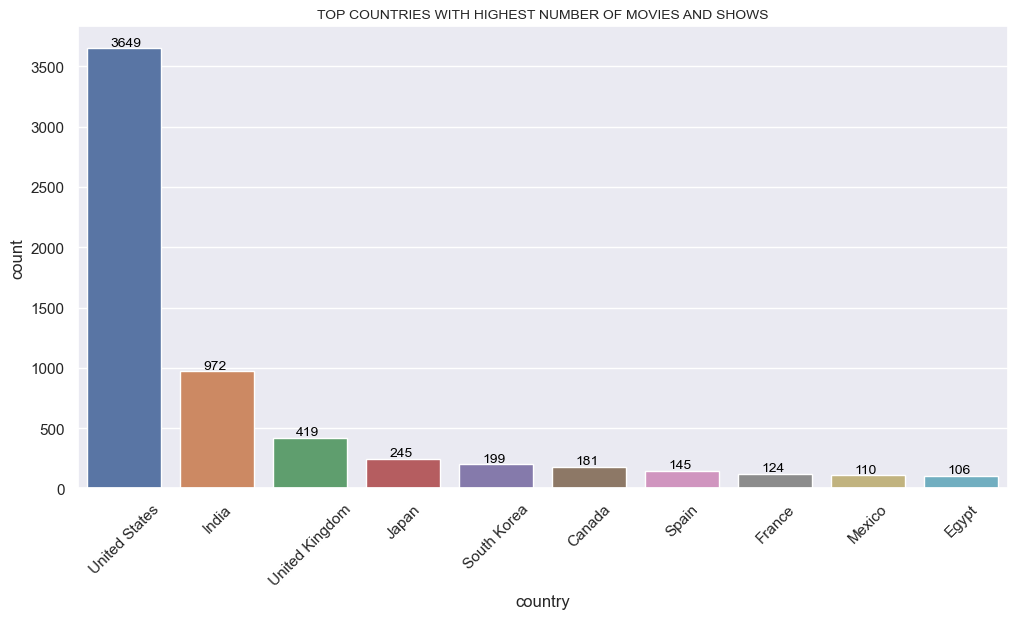

In [51]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data = data , x= 'country' ,order = data['country'].value_counts().head(10).index)
plt.title("TOP COUNTRIES WITH HIGHEST NUMBER OF MOVIES AND SHOWS",fontsize=10)
plt.xticks(rotation = 45)

for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+20,str(int((i.get_height()))),
            rotation=0,fontsize=10,color='black')


plt.show()

##### United states having highest number of movies and TV series counts combined.

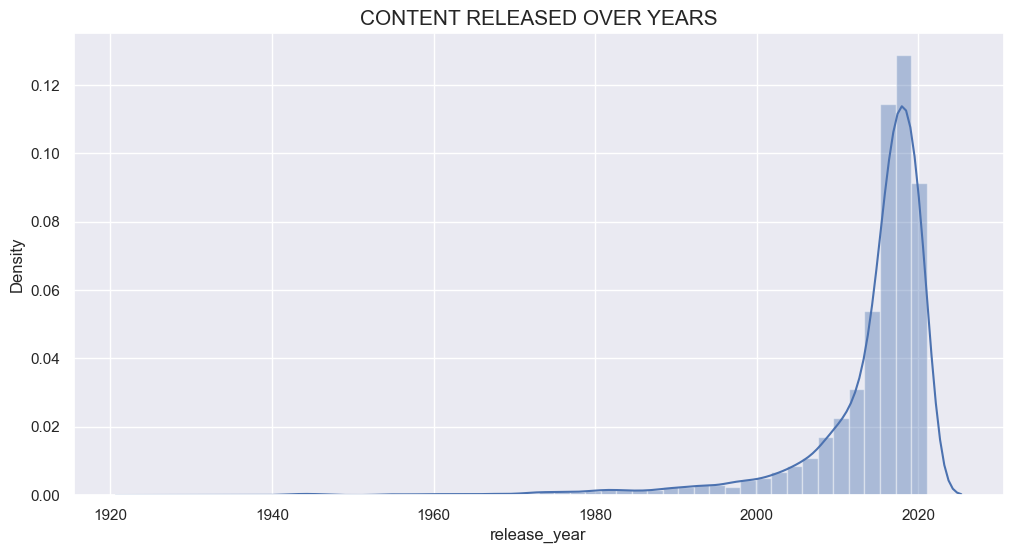

In [52]:
plt.figure(figsize=(12,6))
sns.distplot(data["release_year"])
plt.title("CONTENT RELEASED OVER YEARS",fontsize=15)
plt.show()

#### the number of content released after year 2000 is increasing massively year by year .. after year 2019 there is a dip.

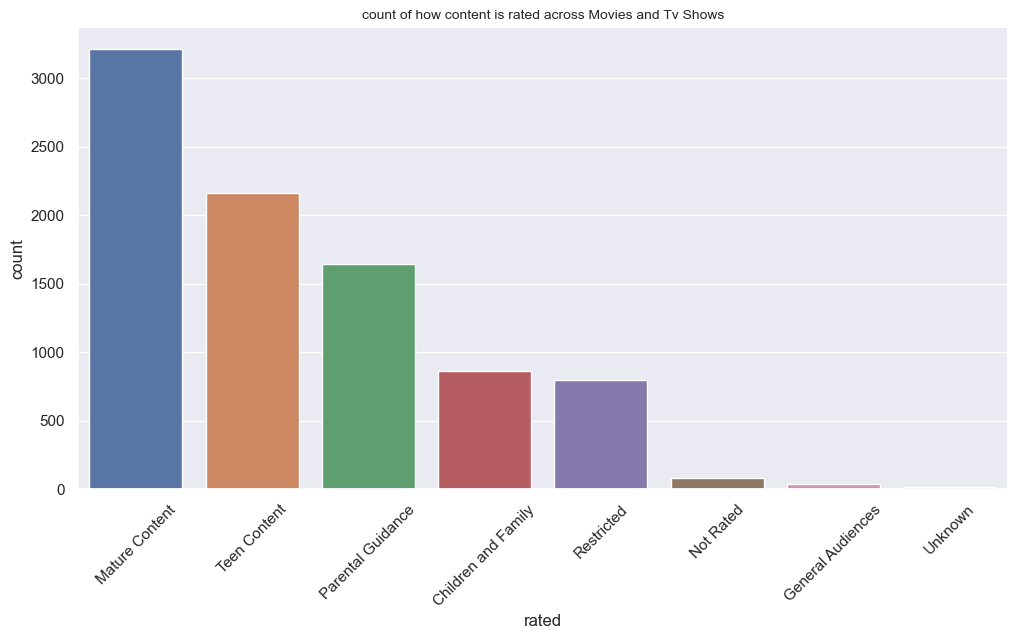

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x="rated",
             order=data['rated'].value_counts().index)
plt.xticks(rotation = 45)
plt.title("count of how content is rated across Movies and Tv Shows",fontsize=10)
plt.show()

##### most of the content is mature rated

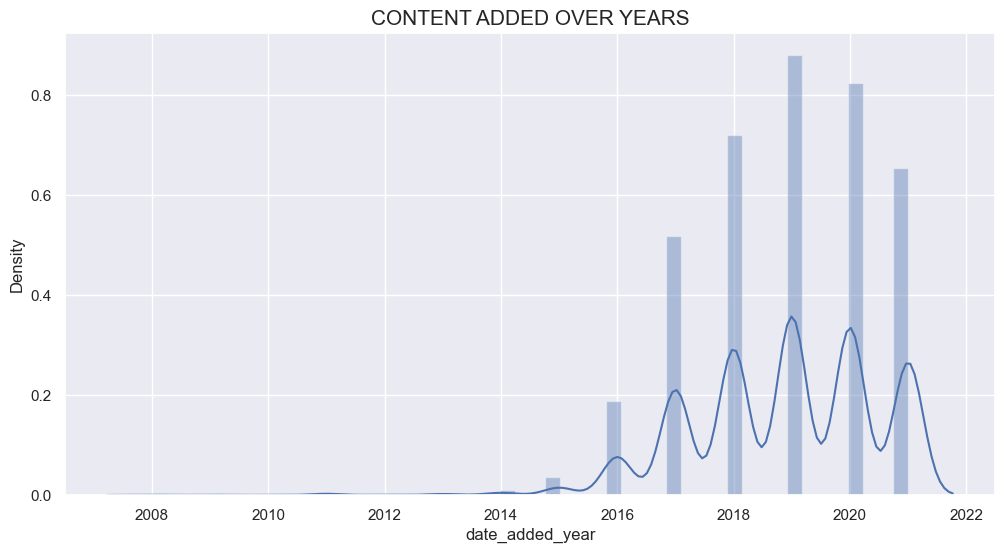

In [54]:
plt.figure(figsize=(12,6))
sns.distplot(data["date_added_year"])
plt.title("CONTENT ADDED OVER YEARS",fontsize=15)
plt.show()

#### Year 2019 : Most of the Movies and Tv shows were Added. Then it Decreases following years

## bivariate analysiss

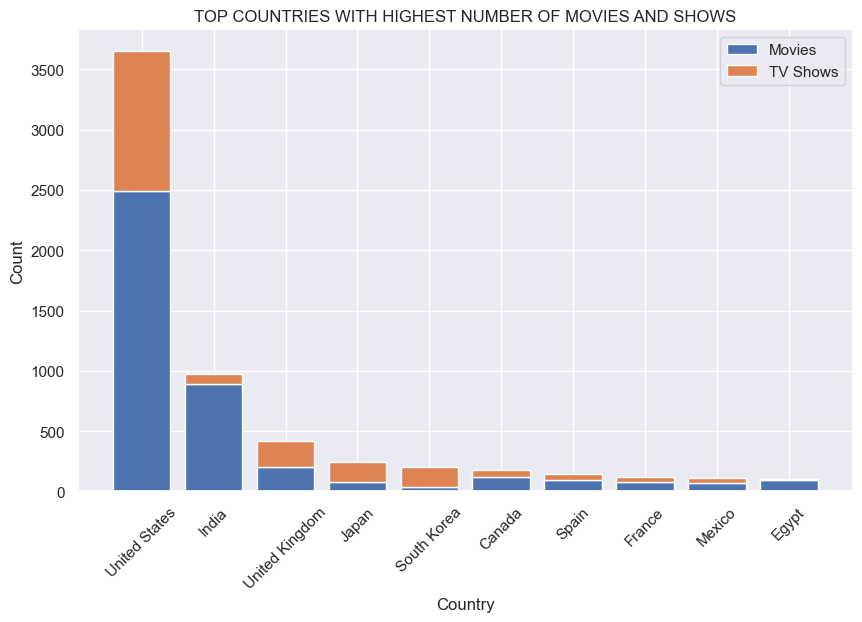

In [55]:
# Group the data by country and type, and count the occurrences
country_counts = data.groupby(['country', 'type']).size().unstack()

# Calculate the total count (sum of TV shows and movies)
country_counts['total'] = country_counts['Movie'] + country_counts['TV Show']

# Sort the countries by the total count in descending order
sorted_countries = country_counts.sort_values('total', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_countries.index, sorted_countries['Movie'], label='Movies')
plt.bar(sorted_countries.index, sorted_countries['TV Show'], bottom=sorted_countries['Movie'], label='TV Shows')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('TOP COUNTRIES WITH HIGHEST NUMBER OF MOVIES AND SHOWS')
plt.xticks(rotation=45)
plt.legend()
plt.show()

#### Japan and South Korea are countries where counts of Tv Series are more than count of movies. United Kingdom produces almost same number of movies and Tv series 

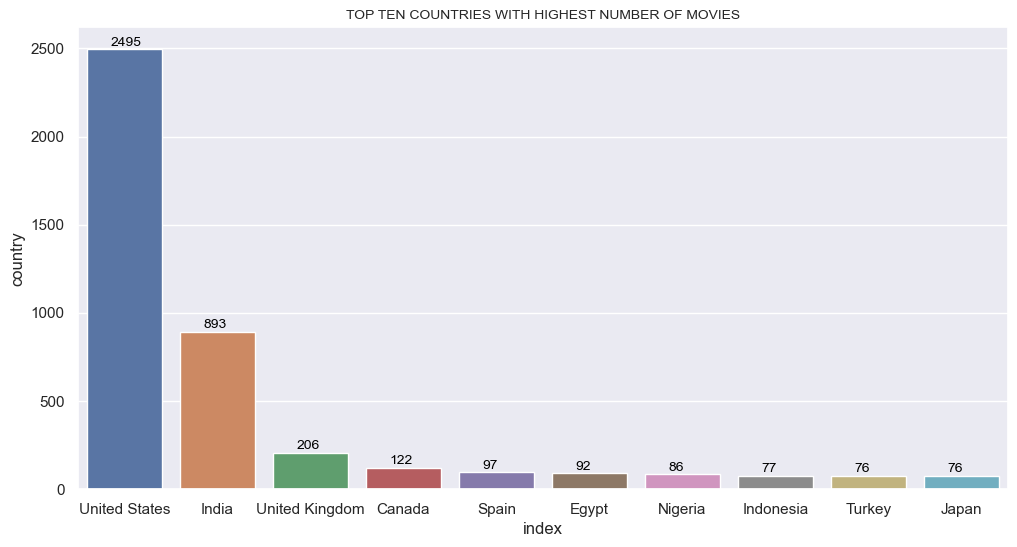

In [56]:
temp=data[data["type"]=="Movie"]
movies=temp["country"].value_counts().reset_index()[0:10]
plt.figure(figsize=(12,6))
plt.title("TOP TEN COUNTRIES WITH HIGHEST NUMBER OF MOVIES",fontsize=10)
ax=sns.barplot(x=movies["index"],y=movies["country"])
for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+20,str(int((i.get_height()))),
            rotation=0,fontsize=10,color='black')

#### United States has most number of movies followed by India.

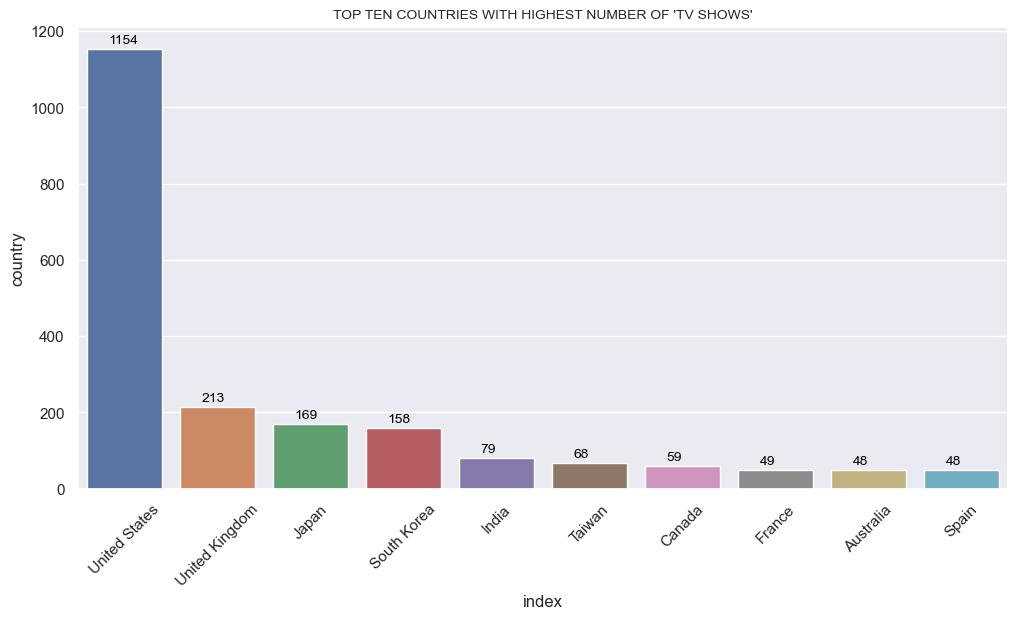

In [57]:
temp = data[data["type"]=='TV Show']
Tv = temp["country"].value_counts().reset_index()[0:10]
plt.figure(figsize=(12,6))
plt.title("TOP TEN COUNTRIES WITH HIGHEST NUMBER OF 'TV SHOWS'",fontsize=10)
ax=sns.barplot(x=Tv["index"],y=Tv["country"])
plt.xticks(rotation =45)
for i in ax.patches:
    ax.text(i.get_x()+.23,i.get_height()+15,str(int((i.get_height()))),
            rotation=0,fontsize=10,color='black')

#### United States has most number of Tv Shows followed by Uniited Kingdom.

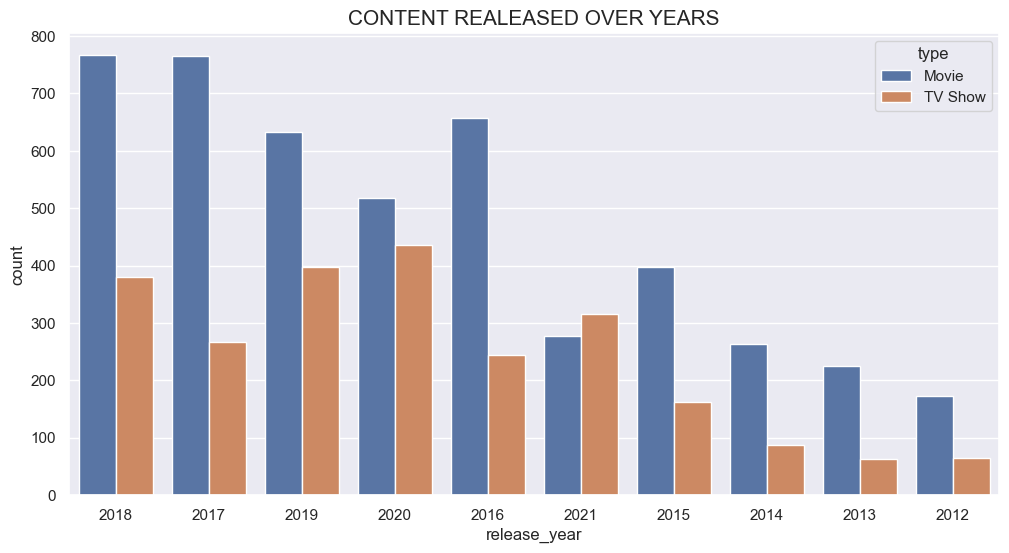

In [58]:
plt.figure(figsize=(12,6))
sns.countplot(data = data , x='release_year', hue ='type',
             order=data['release_year'].value_counts().iloc[:10].index)
plt.title("CONTENT REALEASED OVER YEARS",fontsize=15)
plt.show()

#### year 2016 , 2017 and 2018 are the peak years for Movie released but then we can see the dip in year 2019 , 2020 and 2021
#### we can see the gradually increase in number TV Series realesed accorss years 2012 to 2020.

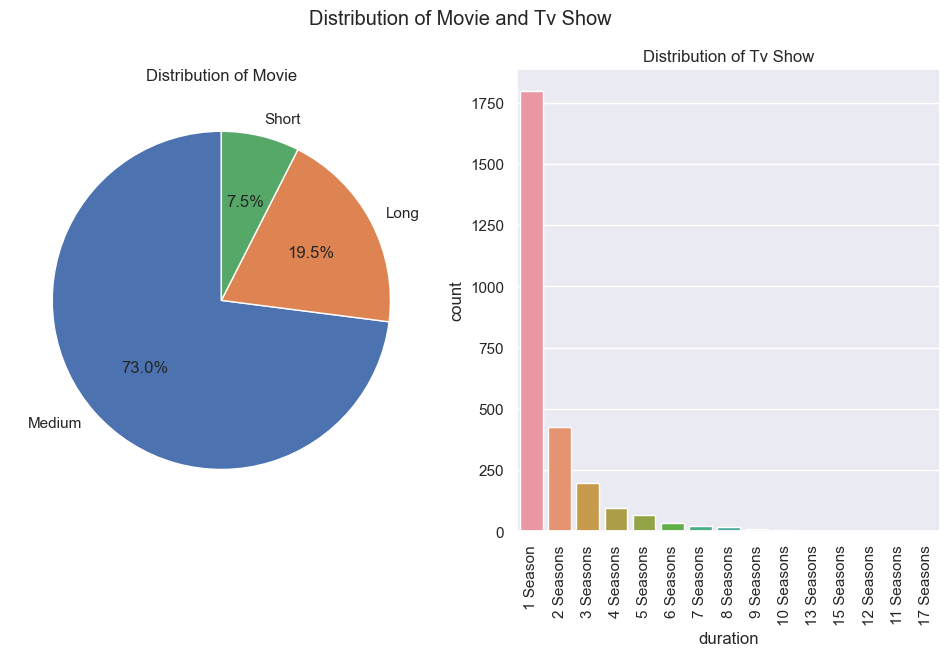

In [59]:
temp1 = data[data["type"]=="Movie"]
temp2 = data[data["type"]=='TV Show']

fig = plt.subplots(1,2,figsize = (12,6))
plt.suptitle('Distribution of Movie and Tv Show')

plt.subplot(1,2,1)
plt.title('Distribution of Movie' )
plt.pie(temp1['duration'].value_counts() ,labels=temp1['duration'].value_counts().index, autopct='%1.1f%%',startangle=90)


plt.subplot(1,2,2)
sns.countplot(data = temp2 , x= 'duration' ,order = temp2['duration'].value_counts().head(20).index)
plt.xticks(rotation=90)
plt.title('Distribution of Tv Show')

plt.show()

#### number of movies with medium duration i.e movie duration ranges between 60 min to 120 min are greater in number

#### number of Tv Series with less number of seasons are high compare to the high number of seasons

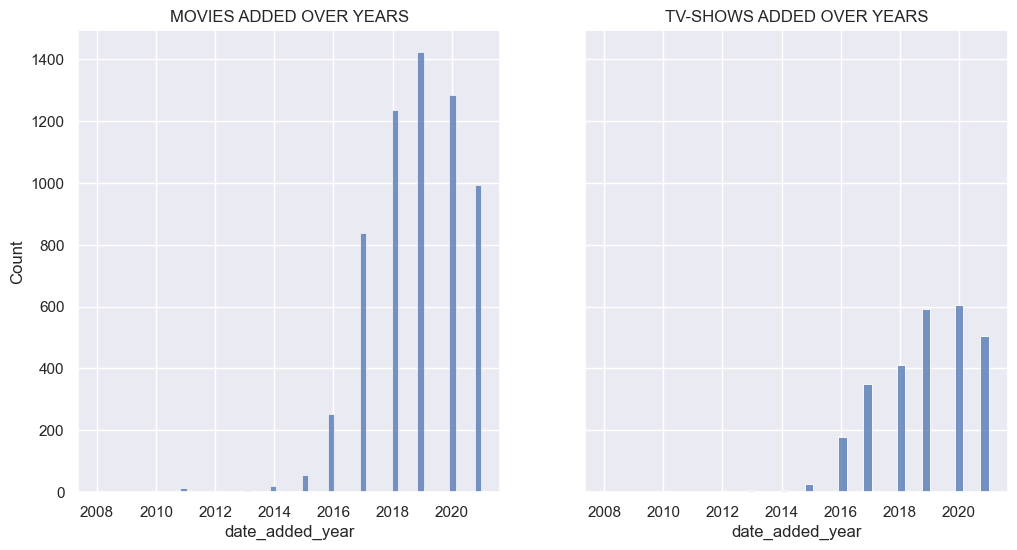

In [60]:
temp1 = data[data["type"]=="Movie"]
temp2 = data[data["type"]=='TV Show']

fig , axes = plt.subplots(1,2,figsize = (12,6),sharey=True)



sns.histplot(data = temp1 , x = 'date_added_year' , ax = axes[0])
sns.histplot(data = temp2 , x= 'date_added_year' , ax = axes[1])


axes[0].set_title("MOVIES ADDED OVER YEARS") 
axes[1].set_title("TV-SHOWS ADDED OVER YEARS")

plt.show()

#### We can say that every year from year 2017 number of movies were added to netflix are  as almost twice to the number of Tv shows

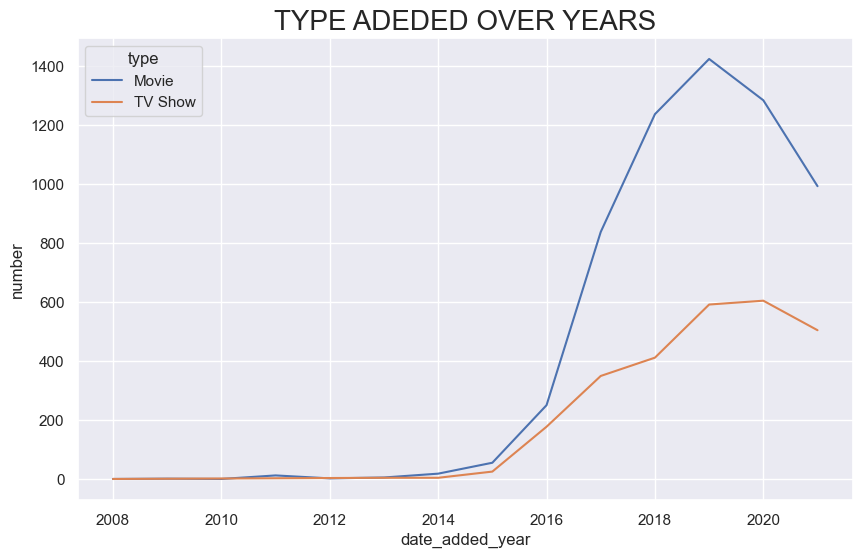

In [61]:
new=data[["type","date_added_year"]].value_counts().reset_index()
new.columns=["type","date_added_year","number"]
new
plt.figure(figsize=(10,6))
sns.lineplot(data=new,x="date_added_year",y="number",hue="type")
plt.title("TYPE ADEDED OVER YEARS",fontsize=20)
plt.show()

#### year 2019 is the peak year for movies added to netflix
#### year 2019 and 2020 are the peak years for Tv shows added to netflix

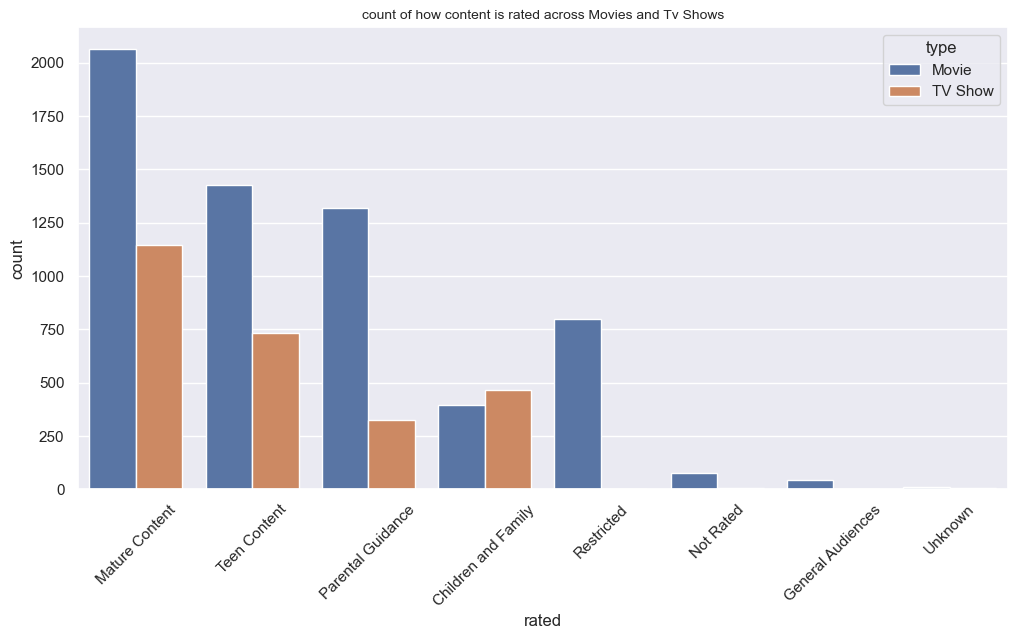

In [62]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x="rated", hue = 'type',
             order=data['rated'].value_counts().index)
plt.xticks(rotation = 45)
plt.title("count of how content is rated across Movies and Tv Shows",fontsize=10)
plt.show()

#### in both the cases of Movies and Tv shows mature content is most in number

In [63]:
temp1 = data[data["type"]=="Movie"]
temp2 = data[data["type"]=='TV Show']


fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "domain"}, {"type": "domain"}]],
    subplot_titles=("<b>Type of content present in movies<b>","<b>Type of content present in Tv shows<b>")
)

fig.add_trace(go.Pie(labels = temp1['rated'].value_counts().index,
                     values = temp1['rated'].value_counts()),
              row=1, col=1)

fig.add_trace(go.Pie(labels = temp2['rated'].value_counts().index,
                     values = temp2['rated'].value_counts()),
              row=1, col=2)

fig.update_layout(height=600,
                  showlegend=True
                  )

fig.show()

#### more than 30% content of Movies is for matured audience whilest more than 40% content of Tv show is for matured audience.

# Insights we got from the Netflix dataset after EDA

1. on netflix almost 70% content are movies while 30 perecnt are Tv shows.
2. United states having highest number of movies and TV series counts combined.

   Japan and South Korea are countries where counts of Tv Series are more than count of movies. United Kingdom produces almost same       number of movies and Tv series. 

   United States has most number of movies followed by India.

   United States has most number of Tv Shows followed by Uniited Kingdom.

3. the number of content realsed after year 2000 is increasing massively year by year .. after year 2019 there is a dip.
   
   year 2016 , 2017 and 2018 are the peak years for Movie released but then we can see the dip in year 2019 , 2020 and 2021.

   we can see the gradually increase in number TV Series realesed accorss years 2012 to 2020.

   (one of the main reason could be CORONA for the dip in content released.)
   
4. most of the content is mature rated i.e 'TV-14' rated.

   in both the cases of Movies and Tv shows mature content is most in number.

   more than 30% content of Movies is for matured audience whilest more than 40% content of Tv show is for matured audience.
   
5. Year 2019 : Most of the Movies and Tv shows were Added. Then it Decreases following years.

   We can say that every year from year 2017 number of movies were added to netflix are  as almost twice to the number of Tv shows.

   year 2019 is the peak year for movies added to netflix.

   year 2019 and 2020 are the peak years for Tv shows added to netflix.
   
6. number of movies with medium duration i.e movie duration ranges between 60 min to 120 min are greater in number.

   number of Tv Series with less number of seasons are high compare to the high number of seasons

# Thank You...